In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing data

df = pd.read_csv(r"C:\Users\sravi\Downloads\ICTAK\Unsupervised learning\Wine_clust .csv")
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
# Basic information about data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [4]:
# Statistical information

df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
# size of data

df.shape

(178, 13)

In [6]:
# Finding null values

df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [24]:
# StandardScaling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_sc = sc.fit_transform(df)
df_sc = pd.DataFrame(df_sc)
df_sc.values

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

## k-Means clustering

In [25]:
from sklearn.cluster import KMeans
x = df.iloc[:,[0,4]].values
x

array([[ 14.23, 127.  ],
       [ 13.2 , 100.  ],
       [ 13.16, 101.  ],
       [ 14.37, 113.  ],
       [ 13.24, 118.  ],
       [ 14.2 , 112.  ],
       [ 14.39,  96.  ],
       [ 14.06, 121.  ],
       [ 14.83,  97.  ],
       [ 13.86,  98.  ],
       [ 14.1 , 105.  ],
       [ 14.12,  95.  ],
       [ 13.75,  89.  ],
       [ 14.75,  91.  ],
       [ 14.38, 102.  ],
       [ 13.63, 112.  ],
       [ 14.3 , 120.  ],
       [ 13.83, 115.  ],
       [ 14.19, 108.  ],
       [ 13.64, 116.  ],
       [ 14.06, 126.  ],
       [ 12.93, 102.  ],
       [ 13.71, 101.  ],
       [ 12.85,  95.  ],
       [ 13.5 ,  96.  ],
       [ 13.05, 124.  ],
       [ 13.39,  93.  ],
       [ 13.3 ,  94.  ],
       [ 13.87, 107.  ],
       [ 14.02,  96.  ],
       [ 13.73, 101.  ],
       [ 13.58, 106.  ],
       [ 13.68, 104.  ],
       [ 13.76, 132.  ],
       [ 13.51, 110.  ],
       [ 13.48, 100.  ],
       [ 13.28, 110.  ],
       [ 13.05,  98.  ],
       [ 13.07,  98.  ],
       [ 14.22, 128.  ],


In [26]:
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\sravi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sravi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sravi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sravi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [27]:
wcss

[36222.76639157303,
 13618.766001224614,
 7201.482294629244,
 4127.770622432075,
 2979.9012412212064,
 2219.3347679574786,
 1508.1367332879645,
 1065.1171489180538,
 903.7561653062806,
 743.0257543139332]

Text(0, 0.5, 'wcss')

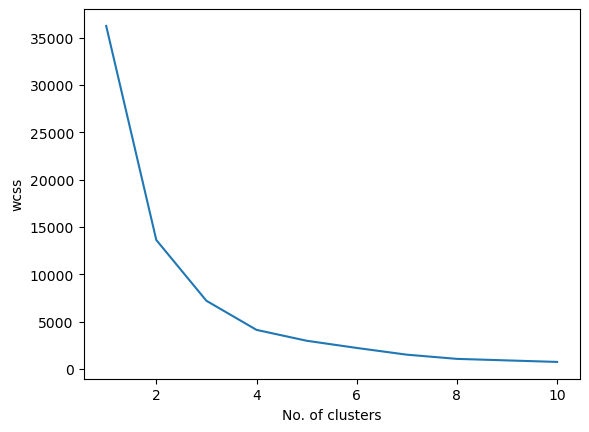

In [28]:
plt.plot(range(1,11),wcss)
plt.xlabel('No. of clusters')
plt.ylabel('wcss')

In [29]:
kmeans = KMeans(n_clusters=3,init='k-means++')
y_kmeans = kmeans.fit_predict(x)

C:\Users\sravi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sravi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


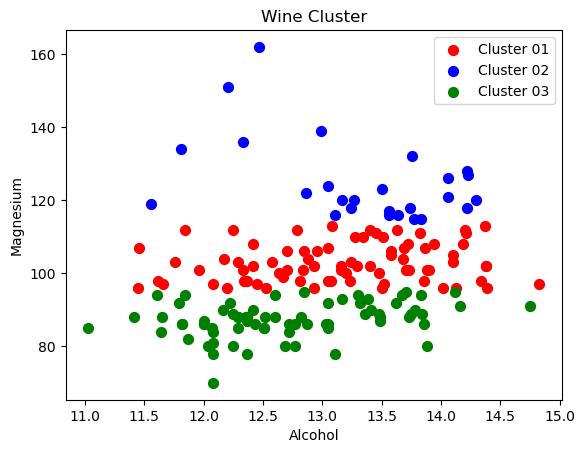

In [32]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=50,c='red',label='Cluster 01')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=50,c='blue',label='Cluster 02')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=50,c='green',label='Cluster 03')
plt.title('Wine Cluster')
plt.xlabel('Alcohol')
plt.ylabel('Magnesium')
plt.legend()

In [33]:
# Silhouette score

from sklearn.metrics import silhouette_score
silhouette_score_avg=silhouette_score(x,y_kmeans)
silhouette_score_avg

0.5491750582131714

## Agglomerative Clustering

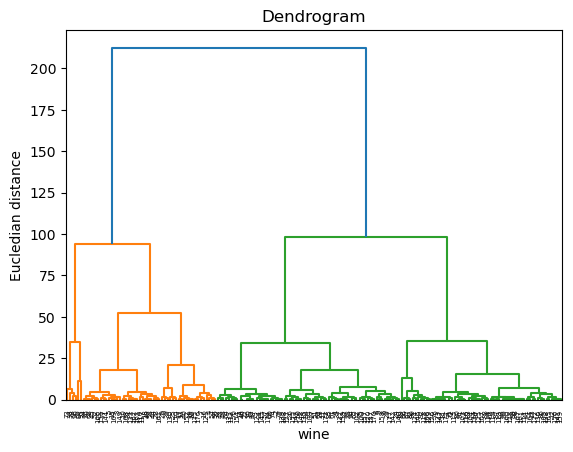

In [34]:
# Optimum no. of clusters needed using dendrogram method

import scipy.cluster.hierarchy as sch
dend = sch.dendrogram(sch.linkage(x,method="ward"))
plt.title('Dendrogram')
plt.xlabel('wine')
plt.ylabel('Eucledian distance')
plt.show()

In [35]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='ward')
y_hc = hc.fit_predict(x)
y_hc

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0], dtype=int64)

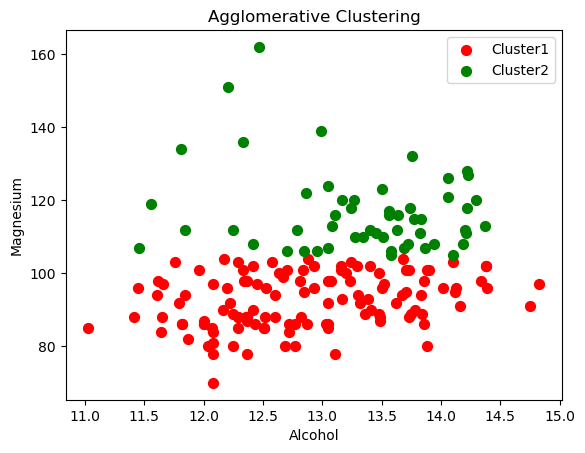

In [37]:
plt.scatter(x[y_hc==0,0],x[y_hc==0,1],s=50,c='red',label='Cluster1')
plt.scatter(x[y_hc==1,0],x[y_hc==1,1],s=50,c='green',label='Cluster2')
plt.xlabel('Alcohol')
plt.ylabel('Magnesium')
plt.title("Agglomerative Clustering")
plt.legend()
plt.show()

In [38]:
silhouette_score_avg=silhouette_score(x,y_hc)
silhouette_score_avg

0.5821518647234066

## DBSCAN Clustering

In [39]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=5, min_samples=5)
labels = dbscan.fit_predict(x)

In [40]:
np.unique(labels)

array([-1,  0], dtype=int64)

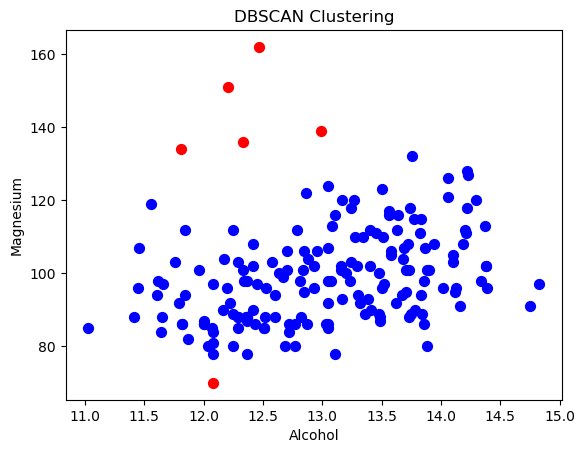

In [41]:
# Plotting the clusters
plt.scatter(x[labels==-1,0], x[labels==-1,1],s=50, c='red')
plt.scatter(x[labels==0,0], x[labels==0,1],s=50, c='blue')

plt.xlabel("Alcohol")
plt.ylabel("Magnesium")
plt.title("DBSCAN Clustering")
plt.show()

In [42]:
silhouette_score_avg=silhouette_score(x,labels)
silhouette_score_avg

0.6412065304200241